In [1]:
# sentence bert or SBERT, this is a natural language processing (NLP) to create sentence embedding(s).

In [2]:
# install
!pip install sentence-transformers

In [3]:
# import
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

c:\Users\vanvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# load in news data
news_data2 = pd.read_csv('sentiment_news_data2.csv')

In [5]:
test = True

# list to store all entries
all_entries = []

# loop and add entry/entries to the list
#for col in [f'Top{i}' for i in range(1, 26)]:
for i in range(1, 26):
    # get top 1 to 25
    col  = f'Top{i}'
    col2 = f'Sen_Top{i}'
    col_data = news_data2[col]
    col_data2 = news_data2[col2]
    #for item in col_data:
    for j in range(len(col_data)):
        #all_entries.append([item]) 
        #all_entries.append([item, col_data2])
        all_entries.append([col_data[j], col_data2[j]])


if test:
    print(len(all_entries))
    print(all_entries[0][0])
    print(all_entries[0][1])
    print(all_entries[1][0])
    print(all_entries[1][1])

43000
north korea open sky south korean medium report
0.0
got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress
-0.3


In [6]:
# may need to enable developer mode

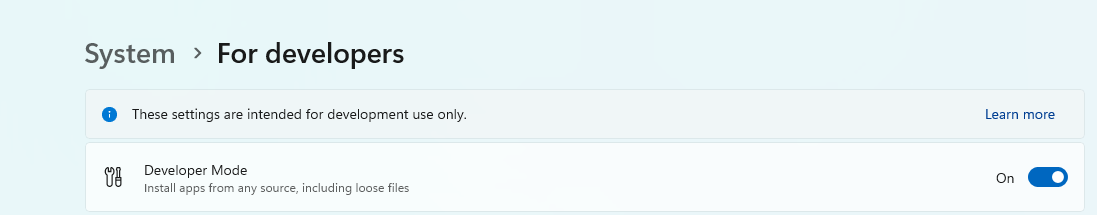

In [7]:
# setup model

# this model can be used for semantic searches
model = SentenceTransformer('all-MiniLM-L6-v2')
all_entries2 = [str(entry[0]) for entry in all_entries]
all_embed = model.encode(all_entries2)

In [8]:
# save file

np.save('all_embed.npy', all_embed)

In [9]:
# sentence for test
one = "China Bought Russia"

# encode new test sentence
one_embed = model.encode(one)

# use cosine
cos_score = util.cos_sim(one_embed, all_embed)

# fix from 2D to 1D and remove NaN items
cos_score = np.nan_to_num(cos_score)
cos_score = cos_score.flatten()

# setup range
ran = 10

# return search range
search_idx = np.argsort(cos_score)[::-1][:ran]

for i, idx in enumerate(search_idx):
    print("i                 : " + str(i))
    print("idx               : " + str(idx))
    print("all_entries2[idx] : " + str(all_entries2[idx]))
    print("cos_score[idx]    : " + str(cos_score[idx]))
    print("\n")


i                 : 0
idx               : 5296
all_entries2[idx] : russia china trust
cos_score[idx]    : 0.7684453


i                 : 1
idx               : 8515
all_entries2[idx] : china russia forging new world order
cos_score[idx]    : 0.69577396


i                 : 2
idx               : 40177
all_entries2[idx] : china bought russia s400 missile taiwan need sam
cos_score[idx]    : 0.64861387


i                 : 3
idx               : 4934
all_entries2[idx] : serbia showcase artillery bought russia china
cos_score[idx]    : 0.6355673


i                 : 4
idx               : 17973
all_entries2[idx] : china decline join armscontrol talk u russia
cos_score[idx]    : 0.62385446


i                 : 5
idx               : 29051
all_entries2[idx] : china india buy russian oil blunting western sanction
cos_score[idx]    : 0.621534


i                 : 6
idx               : 2552
all_entries2[idx] : china russia ditch dollar move toward financial alliance
cos_score[idx]    : 0.61576

In [10]:
# function sent_bert
# input(s)
#  - main   : array with multiple strings
#  - query  : array with 1 string
#  - res    : int
# return(s)
#  - array (size of res) (from highest to lowest score)

# compute sentence bert score among the data samples
def sent_bert(main, query, res, file = None):
    # this model can be used for semantic searches
    model = SentenceTransformer('all-MiniLM-L6-v2')

    if file == None:
        all_entries2 = [entry[0] for entry in main]
        all_embed = model.encode(all_entries2)
    else:
        all_embed = np.load(file)
        all_entries2 = [entry[0] for entry in main]

    # encode new test sentence
    one_embed = model.encode(query)

    # use cosine
    cos_score = util.cos_sim(one_embed, all_embed)

    # fix from 2D to 1D and remove NaN items
    cos_score = np.nan_to_num(cos_score)
    cos_score = cos_score.flatten()

    # return search range
    search_idx = np.argsort(cos_score)[::-1][:res]

    ret_val = []

    for i, idx in enumerate(search_idx):
        ret_val.append([idx, all_entries2[idx], cos_score[idx] ])

    return ret_val


In [11]:
ran = 10

bert_ret = sent_bert(all_entries, ["whales are bad"], ran, 'all_embed.npy')
print(bert_ret)

for i in range(ran):
    print(bert_ret[i][0])
    print(bert_ret[i][1])
    print("\n")

[[np.int64(16897), 'meat really bad', np.float32(0.56592155)], [np.int64(40005), 'beachgoers come together help stranded whale', np.float32(0.5421478)], [np.int64(32769), 'whale spotted pushing dead calf day', np.float32(0.5356828)], [np.int64(5371), '145 whale wash new zealand beach', np.float32(0.52347684)], [np.int64(29402), 'baby whale freed shark net gold coast', np.float32(0.52034795)], [np.int64(13849), 'environment grieving orca mother carry dead calf day whale fight survival', np.float32(0.5184667)], [np.int64(4502), 'group 28 pilot whale successfully refloated notorious new zealand beach dozen marine mammal died week longfinned pilot whale restranded appeared finally swum sea', np.float32(0.51637363)], [np.int64(8633), 'pilot whale died southern thailand swallowing 80 plastic bag thai marine official say whale vomited five bag vain attempt conservation official save canal songkhla province', np.float32(0.5092102)], [np.int64(1279), 'whale advocate least 575 whale killed 2021 

In [12]:
ran = 10

bert_ret = sent_bert(all_entries, ["Whales are good"], ran, 'all_embed.npy')
print(bert_ret)

for i in range(ran):
    print(bert_ret[i][0])
    print(bert_ret[i][1])
    print("\n")

[[np.int64(40005), 'beachgoers come together help stranded whale', np.float32(0.5798886)], [np.int64(32769), 'whale spotted pushing dead calf day', np.float32(0.5264813)], [np.int64(7866), 'researcher think spotted new whale specie mexico', np.float32(0.5228523)], [np.int64(5371), '145 whale wash new zealand beach', np.float32(0.52247626)], [np.int64(4502), 'group 28 pilot whale successfully refloated notorious new zealand beach dozen marine mammal died week longfinned pilot whale restranded appeared finally swum sea', np.float32(0.5170711)], [np.int64(29402), 'baby whale freed shark net gold coast', np.float32(0.5148232)], [np.int64(39960), 'new subspecies pilot whale discovered 250yearold theory proved correct', np.float32(0.5032114)], [np.int64(13849), 'environment grieving orca mother carry dead calf day whale fight survival', np.float32(0.49764165)], [np.int64(24755), 'military sonar disturbs blue whale feeding research reveals highintensity military sonar major impact feeding hab

In [13]:
# handle imports for plots
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

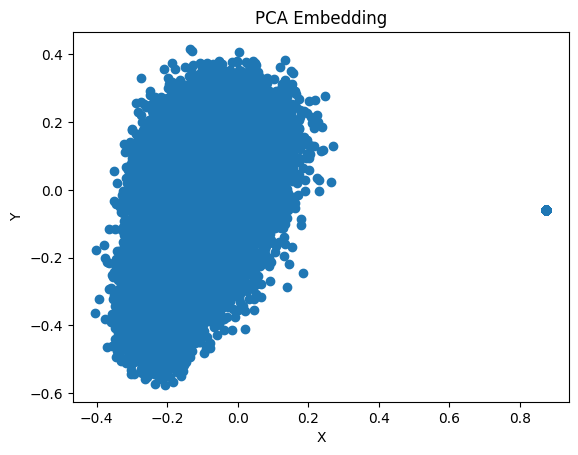

In [14]:
# generate a 2D PCA plot
all_embed = np.load('all_embed.npy')
pca = PCA(n_components=2)
pca_embed = pca.fit_transform(all_embed)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1])
plt.title('PCA Embedding')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# the outlier here is the nan I believe

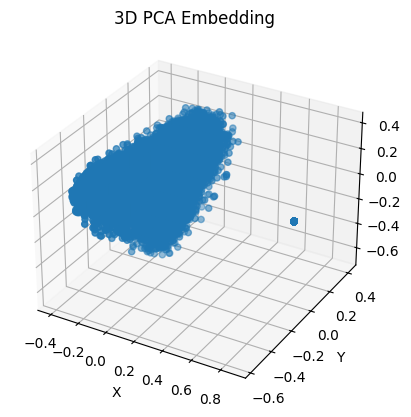

In [15]:
# generate a 3D PCA plot
pca2 = PCA(n_components=3)
pca_embed2 = pca2.fit_transform(all_embed)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pca_embed2[:, 0], pca_embed2[:, 1], pca_embed2[:, 2])
ax.set_title('3D PCA Embedding')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [16]:
# gets centroid
cent = np.mean(pca_embed2)
# get distances
dis = np.linalg.norm(pca_embed2 - cent, axis=1)

# figure out outlier aka max distance
idx = np.argmax(dis)
print(idx)
out = all_entries2[idx]
print(out)

106
nan


In [30]:
! pip install datasets

   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.2 MB 3.3 MB/s eta 0:00:08
   -- ------------------------------------- 1.8/25.2 MB 4.6 MB/s eta 0:00:06
   ---- ----------------------------------- 3.1/25.2 MB 4.9 MB/s eta 0:00:05
   ------- -------------------------------- 4.5/25.2 MB 5.3 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/25.2 MB 5.1 MB/s eta 0:00:04
   ---------- ----------------------------- 6.6/25.2 MB 5.4 MB/s eta 0:00:04
   ----------- ---------------------------- 7.1/25.2 MB 5.1 MB/s eta 0:00:04
   ------------- -------------------------- 8.7/25.2 MB 5.2 MB/s eta 0:00:04
   -------------- ------------------------- 9.4/25.2 MB 5.1 MB/s eta 0:00:04
   ----------------- ---------------------- 10.7/25.2 MB 5.3 MB/s eta 0:00:03
   ------------------- -------------------- 12.1/25.2 MB 5.3 MB/s eta 0:00:03
   --------------------- ------------------ 13.6/25.2 MB 5.5 MB/s eta 0:00:03
   

In [ ]:
# handle imports for analysis
import random
from datasets import load_dataset

In [ ]:
# load the snli (Stanford natural language inference) training dataset
snli_data = load_dataset('snli', split='train')
# set dataset size of 100
size = 100
# set threshold for model evaluation
threshold=0.50
# setup some variable at 0
TP = 0
TN = 0
FP = 0
FN = 0

# print(snli_data)
# print(snli_data['premise'][0])
# print(snli_data['hypothesis'][0])
# print(snli_data['label'][0])
# Dataset({
#     features: ['premise', 'hypothesis', 'label'],
#     num_rows: 550152
# })
# A person on a horse jumps over a broken down airplane.
# A person is training his horse for a competition.
# 1

# weird, labels are marked 0 for true to entailments (basically the premise and hypothesis track logically)
# take 50% entailment, and other 50% not entailment
entail_samp    = [i for i in snli_data if i['label'] == 0][:size//2]
no_entail_samp = [i for i in snli_data if i['label'] != 0][:size//2]
total_samp = entail_samp + no_entail_samp

#print(total_samp)
#[{'premise': 'A person on a horse jumps over a broken down airplane.', 'hypothesis': 'A person is outdoors, on a horse.', 'label': 0}, ...

prem  = [i['premise'] for i in total_samp]
hypo  = [i['hypothesis'] for i in total_samp]
truth = [] 
# loop in sample to figure out entailment or not
for entry in total_samp:
    # if entail, append 1
    if entry['label'] == 0:
        truth.append(1)
    else:
        # else append 0
        truth.append(0)

# setup model
model = SentenceTransformer('all-MiniLM-L6-v2')
prem_embed = model.encode(prem)
hypo_embed = model.encode(hypo)

# loop thorugh range to calculate TP, TN, FP, FN
for i in range(len(prem)):
    # calculate score
    score = util.cos_sim(hypo_embed[i], prem_embed[i])[0][0]
    # check if score is higher then threshold, if so prediction is true
    if score >= threshold:
        pred = True
    else:
        pred = False
    # calculate the TP, TN, FP, FN, increment as needed
    if pred and truth[i]:
        TP = TP + 1
    elif pred and not truth[i]:
        FP = FP + 1
    elif not pred and truth[i]:
        FN = FN + 1
    elif not pred and not truth[i]:
        TN = TN + 1  

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TP: 42, TN: 37, FP: 13, FN: 8


In [60]:
# calculate accuracy
accu = (TP + TN) / (TP + FP + TN + FN)
# calculate precision
prec = TP / (TP + FP)
# calculate recall
recall = TP / (TP + FN)
# calculate F1
f1_score = 2 * (prec * recall) / (prec + recall)

print(f"Accuracy : {accu}"    )
print(f"Precision: {prec}"    )
print(f"Recall   : {recall}"  )
print(f"F1 Score : {f1_score}")


Accuracy : 0.79
Precision: 0.7636363636363637
Recall   : 0.84
F1 Score : 0.8000000000000002


In [ ]:
# print(snli_data['premise'][2])
# print(snli_data['hypothesis'][2])
# print(snli_data['label'][2])
# A person on a horse jumps over a broken down airplane.
# A person is outdoors, on a horse.
# 0

A person on a horse jumps over a broken down airplane.
A person is outdoors, on a horse.
0
